<a href="https://colab.research.google.com/github/faizan-abbas-mir/streamify/blob/main/housepricepredicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install streamlit
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import streamlit as st
import pickle
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv("train.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
features=['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars','YearBuilt']
target = ['SalePrice']
allcolumns= features + target




In [10]:
features


['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'YearBuilt']

In [11]:
allcolumns

['GrLivArea',
 'TotalBsmtSF',
 'OverallQual',
 'GarageCars',
 'YearBuilt',
 'SalePrice']

In [12]:
df_clean = df[allcolumns].dropna()

In [13]:
X=df_clean[features]
y=df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 39763.30
R² Score: 0.79


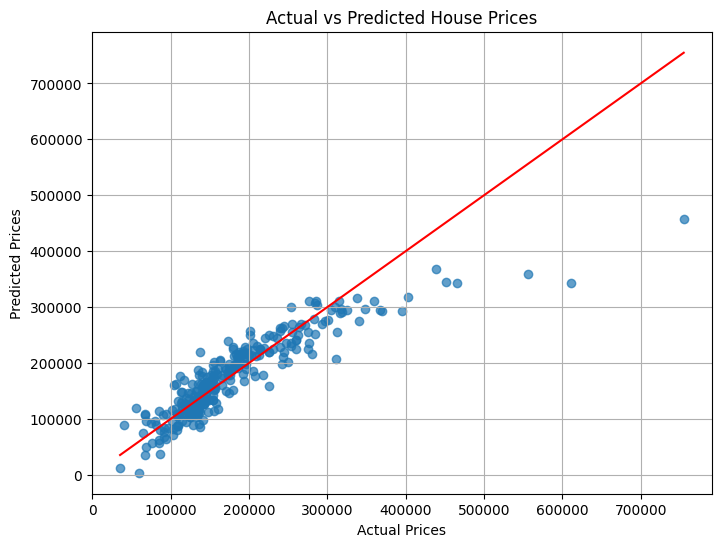

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

In [18]:
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(lr, f)
st.title("House Price Predictor")

sqft = st.number_input("Square Footage", 100, 10000, step=100)
bedrooms = st.number_input("Bedrooms", 1, 10)

if st.button("Predict"):
    features = np.array([[sqft, bedrooms]])  # Adjust as needed
    prediction = model.predict(features)
    st.write(f"Predicted Price: ${prediction[0]:,.2f}")

2025-05-31 07:55:39.555 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 07:55:39.748 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-31 07:55:39.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 07:55:39.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 07:55:39.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 07:55:39.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 07:55:39.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 07:55:39.771 Session state does not 